# 意思決定分析と予測の活用｜第2部 決定分析の基礎
https://logics-of-blue.com/decision-analysis-and-forecast-book-support/

## 第3章	決定分析におけるPythonの活用

### 分析の準備

In [2]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
from IPython.display import Image

# DataFrameの全角文字の出力をきれいにする
pd.set_option('display.unicode.east_asian_width', True)

## 利得行列の作成

- 利得行列を得るのに統一的な方法はない
- 本書では天下り的に与えられるけど、現実世界ではかなり困難な作業

### 利得行列の作成
作りたい利得行列

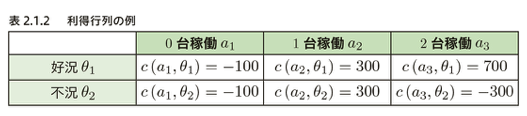

In [3]:
Image("imgs/table_2_1_2.png")

In [4]:
# 利得を計算する際のパラメータ
fixed_cost = 100            # 工場の固定費用(万円)
run_cost = 600              # 機械1台の稼働コスト(万円)
sale_price = 0.2            # 製品1つの販売価格(万円)

machine_ability = 5000      # 機械1台で作られる製品数(個)
demand_boom = 10000         # 好況時の需要量(個)
demand_slump = 5000         # 不況時の需要量(個)

$製品製造数= machine\_ability\ \times\  機械の稼働台数$

$製品販売数= min(製品製造数, 需要量:demand)$

$売上金額= 製品販売数\ \times\ sale\_price$

$製造コスト= fixed\_cost\ +\ run\_cost \times\ 機械の稼働数$

In [5]:
# 出荷される製品の個数
num_product_df = pd.DataFrame({
    '0台': [0, 0],
    '1台': [min([machine_ability, demand_boom]), 
            min([machine_ability, demand_slump])],
    '2台': [min([machine_ability * 2, demand_boom]), 
            min([machine_ability * 2, demand_slump])]
})
num_product_df.index = ['好況', '不況']
print(num_product_df)

      0台   1台    2台
好況    0  5000  10000
不況    0  5000   5000


In [6]:
# 売上行列
sales_df = num_product_df * sale_price
print(sales_df)


      0台     1台     2台
好況  0.0  1000.0  2000.0
不況  0.0  1000.0  1000.0


In [7]:
# 製造コスト
run_cost_df = pd.DataFrame({
    '0台': np.repeat(fixed_cost               , 2),
    '1台': np.repeat(fixed_cost + run_cost    , 2),
    '2台': np.repeat(fixed_cost + run_cost * 2, 2)
})
run_cost_df.index = ['好況', '不況']
print(run_cost_df)

      0台  1台   2台
好況  100  700  1300
不況  100  700  1300


In [8]:
# 利得行列
payoff_df = sales_df - run_cost_df
print(payoff_df)

        0台    1台    2台
好況 -100.0  300.0  700.0
不況 -100.0  300.0 -300.0


### 利得行列を得る関数の作成

In [9]:
def calc_payoff_table(fixed_cost, run_cost, sale_price, 
                      machine_ability, demand_boom, demand_slump):
    # 出荷される製品の個数
    num_product_df = pd.DataFrame({
        '0台': [0,0],
        '1台': [min([machine_ability, demand_boom]), 
                min([machine_ability, demand_slump])],
        '2台': [min([machine_ability * 2, demand_boom]), 
                min([machine_ability * 2, demand_slump])]
    })
    # 売り上げ行列
    sales_df = num_product_df * sale_price
    # 製造コスト
    run_cost_df = pd.DataFrame({
        '0台': np.repeat(fixed_cost               , 2),
        '1台': np.repeat(fixed_cost + run_cost    , 2),
        '2台': np.repeat(fixed_cost + run_cost * 2, 2)
    })
    # 利得行列
    payoff_df = sales_df - run_cost_df
    payoff_df.index = ['好況', '不況']
    # 結果を返す
    return(payoff_df)

In [10]:
# 利得行列の計算
payoff = calc_payoff_table(fixed_cost=100, run_cost=600, sale_price=0.2, 
                           machine_ability=5000, demand_boom=10000, 
                           demand_slump=5000)
print(payoff)

        0台    1台    2台
好況 -100.0  300.0  700.0
不況 -100.0  300.0 -300.0


## 決定基準の実装

### マキシマックス基準
- 一言で言えば、「最大値の最大値」となるものを選択する、という基準
- 楽観的な判断をしよう、というやつ
- 様々な状況下での各選択肢ごとの最大値(マックス)の最大値(マキシ)を決定基準とするもの
- 様々な状況下での各選択肢ごと($a_j$)の最大値： $\lambda_{max}(a_j)=\underset{\theta_i}{max}\ c(a_j, \theta_i)$
- 上述の値が最大の選択肢：$a^{max}=\underset{a_j}{argmax}\ \lambda_{max}(a_j)$

In [11]:
# 選択肢ごとの最大利得
payoff.max()

0台   -100.0
1台    300.0
2台    700.0
dtype: float64

In [12]:
payoff.max().max()

700.0

In [13]:
# 参考(使わない)
payoff.max().idxmax()

'2台'

In [14]:
# 最大値と等しい利得を持っているかどうかを調べる
payoff.max() == payoff.max().max()

0台    False
1台    False
2台     True
dtype: bool

In [15]:
# 最大値と等しい利得を持つ要素を取得する
payoff.max()[payoff.max() == payoff.max().max()]

2台    700.0
dtype: float64

In [16]:
# インデックスだけを取得する
list(payoff.max()[payoff.max() == payoff.max().max()].index)

['2台']

In [17]:
# 最大値をとるインデックスを取得する。最大値が複数ある場合はすべて出力する。
def argmax_list(series):
    return(list(series[series == series.max()].index))

In [18]:
# 最小値をとるインデックスを取得する。最小値が複数ある場合はすべて出力する。
def argmin_list(series):
    return(list(series[series == series.min()].index))

In [19]:
print('Maximax:', argmax_list(payoff.max()))

Maximax: ['2台']


### マキシミン基準
- 一言で言えば、「最小値の最大値」となるものを選択する、という基準
- 悲観的な判断をしよう、という心意気
- 様々な状況下での各選択肢ごとの最小値(ミン)の最大値(マキシ)を決定基準とするもの
- 様々な状況下での各選択肢ごと($a_j$)の最小値： $\lambda_{min}(a_j)=\underset{\theta_i}{min}\ c(a_j, \theta_i)$
- 上述の値が最大の選択肢：$a^{min}=\underset{a_j}{argmax}\ \lambda_{min}(a_j)$

In [20]:
# 選択肢ごとの最小利得
payoff.min()

0台   -100.0
1台    300.0
2台   -300.0
dtype: float64

In [21]:
print('Maximin:', argmax_list(payoff.min()))

Maximin: ['1台']


### ハーヴィッツの基準
- マキシマックス、マキシミンのあわせ技
- 「楽観係数」を導入することで、マキシマックスとマキシミンをどれくらいの比率で混ぜた基準値をつくるかを決定する
- 楽観係数は主観で決めるので、極めて主観的な基準となる
- $\lambda_{Hurwicz}\ =\ \alpha\ \cdot\ \underset{\theta_i}{max}\ [c(a_j, \theta_i)]\ +\ (1-\alpha)\ \cdot\ \underset{\theta_i}{min}\ [c(a_j, \theta_i)]\ $
- $a^{Hurwicz} = \underset{a_j}{argmax}\ \lambda_{Hurwicz}$

In [22]:
# alpha=0.6としたときのハーヴィッツの基準
hurwicz = payoff.max() * 0.6 + payoff.min() * (1 - 0.6)
hurwicz

0台   -100.0
1台    300.0
2台    300.0
dtype: float64

In [23]:
argmax_list(hurwicz)

['1台', '2台']

In [24]:
# ハーヴィッツの基準による決定を行う関数
def hurwicz(payoff_table, alpha):
    hurwicz = payoff_table.max() * alpha + payoff_table.min() * (1 - alpha)
    return(argmax_list(hurwicz))

楽観係数を変えていくと、途中で選ばれる選択肢が変わってくる。

In [25]:
print('Hurwicz:', hurwicz(payoff, 0.6))

Hurwicz: ['1台', '2台']


In [26]:
print('Hurwicz:', hurwicz(payoff, 0.7))

Hurwicz: ['2台']


In [27]:
print('Hurwicz:', hurwicz(payoff, 0.5))
print('Hurwicz:', hurwicz(payoff, 0.4))

Hurwicz: ['1台']
Hurwicz: ['1台']


### ミニマックスリグレット基準
- 各選択肢において後悔することになる値の最大値を抽出。その値を最小にする(=後悔を最小にする)選択肢を選ぶ基準のこと
- 各選択肢で、「あー、あのときあっちにしておけばよかったな。。」という後悔の量を最小にする、という感じ。
  - とある状況下($\theta_i$)において、「あっちの選択肢にしておけばよかった」というときの差分
- 各選択肢において後悔することになる値 : $r(a_j, \theta_i) = \underset{a_j}{max}[c(a_j, \theta_i)]\ -\ c(a_j, \theta_i)$
- 上記値の最大値：$\lambda_{max\_regret}(a_j) = \underset{\theta_i}{max}\ r(a_j, \theta_i)$
  - 各選択肢を選んだとき、後悔度合いが最大どれくらいか？を表す
- 上記の選択肢の最大後悔度が最小値となる選択肢：$a^{regret} = \underset{a_j}{argmin}\ \lambda_{max\_regret}(a_j)$
  - その選択肢の後悔度の最大値が少ない選択肢を選べば、利得が大きくなるよね、という話

In [28]:
# 「最も利得が高くなる選択」をとったときの利得
best_df = pd.concat([payoff.max(axis=1)] * payoff.shape[1], axis=1)
best_df.columns = payoff.columns
print(best_df)


        0台    1台    2台
好況  700.0  700.0  700.0
不況  300.0  300.0  300.0


In [29]:
# 参考：Seriesを複製
[payoff.max(axis=1)] * 2

[好況    700.0
 不況    300.0
 dtype: float64,
 好況    700.0
 不況    300.0
 dtype: float64]

In [30]:
# リグレット
regret_df = best_df - payoff
print(regret_df)

        0台    1台    2台
好況  800.0  400.0    0.0
不況  400.0    0.0  600.0


In [31]:
# 各々の選択肢におけるリグレットの最大値
regret_df.max()

0台    800.0
1台    400.0
2台    600.0
dtype: float64

In [32]:
argmin_list(regret_df.max())

['1台']

In [33]:
# ミニマックスリグレット基準による決定を行う関数
def minimax_regret(payoff_table):
    best_df = pd.concat(
        [payoff_table.max(axis=1)] * payoff_table.shape[1], axis=1)
    best_df.columns = payoff_table.columns
    regret_df = best_df - payoff_table
    return(argmin_list(regret_df.max()))

In [34]:
print('Minimax regret:', minimax_regret(payoff))

Minimax regret: ['1台']


### ラプラスの基準
- 各選択肢の利得の算術平均を算出。それが最大となる選択肢を選ぶ、という基準
- なので、暗に「各状況(自然の状態)が同じ確率でおこる」という前提を敷いている
- 各選択肢の利得の算術平均：$\lambda_{Laplace}(a_j)=\frac{1}{\#\Theta}\sum_{i=1}^{\#\Theta}c(a_j,\theta_i)$
- 算術平均を最大にする選択肢：$a^{Laplace} = \underset{a_j}{argmax}\ \lambda_{Laplace}(a_j)$

In [35]:
# 選択肢ごとの利得の平均値
payoff.mean()

0台   -100.0
1台    300.0
2台    200.0
dtype: float64

In [36]:
print('Laplace:', argmax_list(payoff.mean()))

Laplace: ['1台']


### 感度分析
#### 感度分析とは
モデルの前提となった数値の変化が、意思決定結果にどれほど影響を与えるのか？を把握するための分析。

#### 今回の感度分析例
- ミニマックスリグレット基準を使って決定
- その際、機械1台の稼働コスト(run_cost)の推定誤差がもたらす影響を見てみる

In [37]:
# 機械1台の稼働コストを増やした(run_cost=625)
payoff_2 = calc_payoff_table(fixed_cost=100, run_cost=625, sale_price=0.2, 
                             machine_ability=5000, demand_boom=10000, 
                             demand_slump=5000)
print(payoff_2)

        0台    1台    2台
好況 -100.0  275.0  650.0
不況 -100.0  275.0 -350.0


In [38]:
# 機械1台の稼働コストを減らした(run_cost=575)
payoff_3 = calc_payoff_table(fixed_cost=100, run_cost=575, sale_price=0.2, 
                             machine_ability=5000, demand_boom=10000, 
                             demand_slump=5000)
print(payoff_3)

        0台    1台    2台
好況 -100.0  325.0  750.0
不況 -100.0  325.0 -250.0


In [39]:
print('Minimax regret:', minimax_regret(payoff_2))

Minimax regret: ['1台']


In [40]:
print('Minimax regret:', minimax_regret(payoff_3))

Minimax regret: ['1台']


In [41]:
# 機械1台の稼働コストをさらに減らした(run_cost=500)
payoff_4 = calc_payoff_table(fixed_cost=100, run_cost=500, sale_price=0.2, 
                             machine_ability=5000, demand_boom=10000, 
                             demand_slump=5000)
print(payoff_4)

        0台    1台    2台
好況 -100.0  400.0  900.0
不況 -100.0  400.0 -100.0


In [42]:
print('Minimax regret:', minimax_regret(payoff_4))

Minimax regret: ['1台', '2台']


1台の稼働コストを100万くらい見誤ると、意思決定の結果が変わってくる。